In [9]:
library(phyloseq)
library(ggplot2)
library(vegan)
library(readr)
library(data.table)
library(dplyr)
library(stats)
library(ggpubr)
library(dunn.test)

In [6]:
#5krare
cadaver = readRDS("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/RDSfiles/all_cohorts_cadaver_5krare.rds")

#otu.5k = data.frame(otu_table(cadaver))
#meta.5k = data.frame(sample_data(cadaver))


In [4]:
#Read in/out to format for ANCOM
otu.5k = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/CSVfiles/5k_otu.csv")
meta.5k = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/CSVfiles/5k_meta.csv")

#### ANCOM with Covariates

In [6]:
meta.5k$The_manner_of_death = as.character(meta.5k$The_manner_of_death)
meta.5k$The_manner_of_death[which(meta.5k$The_manner_of_death == "Accident_road traffic accident")] = "Accident"
meta.5k$The_manner_of_death[which(meta.5k$The_manner_of_death == "Accident_Road traffic accident")] = "Accident"
meta.5k$The_manner_of_death[which(meta.5k$The_manner_of_death == "Natural death")] = "Natural"
meta.5k$The_manner_of_death[which(meta.5k$The_manner_of_death == "Undetermined")] = "Natural"
head(as.factor(meta.5k$The_manner_of_death))

[1] Natural  Natural  Natural  Natural  Natural  Accident
Levels: Accident Homicide Natural Suicide

##### Blood vs other organs

In [11]:
#Group into blood vs all other organs
blood = meta.5k %>%
mutate(Single_Organ = Organ)

blood$Single_Organ = as.character(blood$Single_Organ)
blood$Single_Organ[which(blood$Organ != "Blood")] = "Other"
blood$Single_Organ = as.factor(blood$Single_Organ)
head(blood$Single_Organ)

#RUN ANCOM

comparison_test=ANCOM.main(OTUdat=otu.5k,
                           Vardat=blood,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Single_Organ",
                           adj.formula="Location+Sex+Age+Ethnicity+PMI+bmi_category+The_manner_of_death", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

blood.byorgan.ancom = comparison_test$W.taxa

write.csv(blood.byorgan.ancom, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/MOD.blood.byorgan.csv")

##### Brain vs other organs

In [13]:
#Group into brain vs all other organs
brain = meta.5k %>%
mutate(Single_Organ = Organ)

brain$Single_Organ = as.character(brain$Single_Organ)
brain$Single_Organ[which(brain$Organ != "Brain")] = "Other"
brain$Single_Organ = as.factor(brain$Single_Organ)
head(brain$Single_Organ)

#RUN ANCOM
comparison_test=ANCOM.main(OTUdat=otu.5k,
                           Vardat=brain,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Single_Organ",
                           adj.formula="Location+Sex+Age+Ethnicity+PMI+bmi_category+The_manner_of_death", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

brain.byorgan.ancom = comparison_test$W.taxa

write.csv(brain.byorgan.ancom, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/MOD.brain.byorgan.csv")

[1] Brain Other Other Other Other Other
Levels: Brain Other

##### Heart vs other organs

In [19]:
#Group into heart vs all other organs
heart = meta.5k %>%
mutate(Single_Organ = Organ)

heart$Single_Organ = as.character(heart$Single_Organ)
heart$Single_Organ[which(heart$Organ != "Heart")] = "Other"
heart$Single_Organ = as.factor(heart$Single_Organ)
head(heart$Single_Organ)

#RUN ANCOM
comparison_test=ANCOM.main(OTUdat=otu.5k,
                           Vardat=heart,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Single_Organ",
                           adj.formula="Location+Sex+Age+Ethnicity+PMI+bmi_category+The_manner_of_death", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

heart.byorgan.ancom = comparison_test$W.taxa

write.csv(heart.byorgan.ancom, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/MOD.heart.byorgan.csv")

[1] Other Heart Other Other Other Other
Levels: Heart Other

##### Liver vs other organs

In [14]:
#Group into liver vs all other organs
liver = meta.5k %>%
mutate(Single_Organ = Organ)

liver$Single_Organ = as.character(liver$Single_Organ)
liver$Single_Organ[which(liver$Organ != "Liver")] = "Other"
liver$Single_Organ = as.factor(liver$Single_Organ)
head(liver$Single_Organ)

#RUN ANCOM
comparison_test=ANCOM.main(OTUdat=otu.5k,
                           Vardat=liver,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Single_Organ",
                           adj.formula="Location+Sex+Age+Ethnicity+PMI+bmi_category+The_manner_of_death", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

liver.byorgan.ancom = comparison_test$W.taxa

write.csv(liver.byorgan.ancom, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/MOD.liver.byorgan.csv")

[1] Other Other Liver Other Other Liver
Levels: Liver Other

##### Spleen vs other organs

In [15]:
#Group into spleen vs all other organs
spleen = meta.5k %>%
mutate(Single_Organ = Organ)

spleen$Single_Organ = as.character(spleen$Single_Organ)
spleen$Single_Organ[which(spleen$Organ != "Spleen")] = "Other"
spleen$Single_Organ = as.factor(spleen$Single_Organ)
head(spleen$Single_Organ)

#RUN ANCOM
comparison_test=ANCOM.main(OTUdat=otu.5k,
                           Vardat=spleen,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Single_Organ",
                           adj.formula="Location+Sex+Age+Ethnicity+PMI+bmi_category+The_manner_of_death", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

spleen.byorgan.ancom = comparison_test$W.taxa

write.csv(spleen.byorgan.ancom, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/MOD.spleen.byorgan.csv")

[1] Other  Other  Other  Spleen Other  Other 
Levels: Other Spleen

##### Prostate vs other organs

In [16]:
#Group into prostate vs all other organs
prostate = meta.5k %>%
mutate(Single_Organ = Organ)

prostate$Single_Organ = as.character(prostate$Single_Organ)
prostate$Single_Organ[which(prostate$Organ != "Prostate")] = "Other"
prostate$Single_Organ = as.factor(prostate$Single_Organ)
head(prostate$Single_Organ)

#RUN ANCOM
comparison_test=ANCOM.main(OTUdat=otu.5k,
                           Vardat=prostate,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Single_Organ",
                           adj.formula="Location+Sex+Age+Ethnicity+PMI+bmi_category+The_manner_of_death", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

prostate.byorgan.ancom = comparison_test$W.taxa

write.csv(prostate.byorgan.ancom, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/MOD.prostate.byorgan.csv")

[1] Other Other Other Other Other Other
Levels: Other Prostate

##### Uterus vs other organs

In [17]:
#Group into uterus vs all other organs
uterus = meta.5k %>%
mutate(Single_Organ = Organ)

uterus$Single_Organ = as.character(uterus$Single_Organ)
uterus$Single_Organ[which(uterus$Organ != "Uterus")] = "Other"
uterus$Single_Organ = as.factor(uterus$Single_Organ)
head(uterus$Single_Organ)

#RUN ANCOM
comparison_test=ANCOM.main(OTUdat=otu.5k,
                           Vardat=uterus,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Single_Organ",
                           adj.formula="Location+Sex+Age+Ethnicity+PMI+bmi_category+The_manner_of_death", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

uterus.byorgan.ancom = comparison_test$W.taxa

write.csv(uterus.byorgan.ancom, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/MOD.uterus.byorgan.csv")

[1] Other Other Other Other Other Other
Levels: Other Uterus

#### Differences associated with heart disease

In [5]:
#Group into blood vs all other organs
#blood = meta.5k %>%
#mutate(Single_Organ = Organ)

#blood$Single_Organ = as.character(blood$Single_Organ)
#blood$Single_Organ[which(blood$Organ != "Blood")] = "Other"
#blood$Single_Organ = as.factor(blood$Single_Organ)
#head(blood$Single_Organ)

#RUN ANCOM

comparison_test=ANCOM.main(OTUdat=otu.5k,
                           Vardat=meta.5k,
                           adjusted=TRUE,
                           repeated=F,
                           main.var="Heart_Disease",
                           adj.formula="Location+Sex+Age+Ethnicity+PMI+bmi_category", #covariates
                           repeat.var=NULL,
                           longitudinal=FALSE,
                           random.formula=NULL,
                           multcorr=2, #2 corresponds to BH FDR correction
                           sig=0.05,
                           prev.cut=0.90)

blood.byorgan.ancom = comparison_test$W.taxa

write.csv(blood.byorgan.ancom, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/HeartDisease.allorgans.csv")

##### Suicide w all organs

### Run DeSEQ to get log2fold change values for ancom-identified OTUs

In [29]:
library(DESeq2)

In [24]:
#Read metadata in/out to convert to mapfile for new ps object (retaining Single_MOD column)
#write.csv(blood, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/blood.meta.csv")
#write.csv(brain, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/brain.meta.csv")
#write.csv(heart, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/heart.meta.csv")
#write.csv(liver, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/liver.meta.csv")
#write.csv(spleen, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/spleen.meta.csv")
#write.csv(prostate, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/prostate.meta.csv")
#write.csv(uterus, "/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/uterus.meta.csv")

blood.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/blood.meta.txt")
brain.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/brain.meta.txt")
heart.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/heart.meta.txt")
liver.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/liver.meta.txt")
spleen.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/spleen.meta.txt")
prostate.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/prostate.meta.txt")
uterus.map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/uterus.meta.txt")



#create new ps objects 

tree = phy_tree(cadaver)
otu = otu_table(cadaver)
tax = tax_table(cadaver)

blood.ps = merge_phyloseq(blood.map, tree, otu, tax)
brain.ps = merge_phyloseq(brain.map, tree, otu, tax)
heart.ps = merge_phyloseq(heart.map, tree, otu, tax)
liver.ps = merge_phyloseq(liver.map, tree, otu, tax)
spleen.ps = merge_phyloseq(spleen.map, tree, otu, tax)
prostate.ps = merge_phyloseq(prostate.map, tree, otu, tax)
uterus.ps = merge_phyloseq(uterus.map, tree, otu, tax)


In [25]:
#convert ps to deseq object

blood_dds = phyloseq_to_deseq2(blood.ps, ~Single_Organ)
brain_dds = phyloseq_to_deseq2(brain.ps, ~Single_Organ)
heart_dds = phyloseq_to_deseq2(heart.ps, ~Single_Organ)
liver_dds = phyloseq_to_deseq2(liver.ps, ~Single_Organ)
spleen_dds = phyloseq_to_deseq2(spleen.ps, ~Single_Organ)
prostate_dds = phyloseq_to_deseq2(prostate.ps, ~Single_Organ)
uterus_dds = phyloseq_to_deseq2(uterus.ps, ~Single_Organ)

Loading required namespace: DESeq2
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode
converting counts to integer mode


In [31]:
#Run DESeq - blood 5k rarefied

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(blood_dds), 1, gm_mean)


blood_dds = estimateSizeFactors(blood_dds, geoMeans = geoMeans)
blood_dds = estimateDispersions(blood_dds)
abund = getVarianceStabilizedData(blood_dds)

blood_dds = DESeq(blood_dds, test="Wald", fitType="parametric")

res = results(blood_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(blood.ps)[rownames(res), ], "matrix"))

#don't ned significance values, just want log2fold change
#alpha = 0.05
#sigtab = res[which(res$padj < alpha), ]
#sigtab = cbind(as(sigtab, "data.frame"), as(tax_table(blood_pc)[rownames(sigtab), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/blood.deseq.log2fold.csv")


###################################################################################################
#Run DESeq - brain 5k rarefied

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(brain_dds), 1, gm_mean)


brain_dds = estimateSizeFactors(brain_dds, geoMeans = geoMeans)
brain_dds = estimateDispersions(brain_dds)
abund = getVarianceStabilizedData(brain_dds)

brain_dds = DESeq(brain_dds, test="Wald", fitType="parametric")

res = results(brain_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(brain.ps)[rownames(res), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/brain.deseq.log2fold.csv")


###################################################################################################
#Run DESeq - heart 5k rarefied

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(heart_dds), 1, gm_mean)


heart_dds = estimateSizeFactors(heart_dds, geoMeans = geoMeans)
heart_dds = estimateDispersions(heart_dds)
abund = getVarianceStabilizedData(heart_dds)

heart_dds = DESeq(heart_dds, test="Wald", fitType="parametric")

res = results(heart_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(heart.ps)[rownames(res), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/heart.deseq.log2fold.csv")

###################################################################################################
#Run DESeq - liver 5k rarefied

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(liver_dds), 1, gm_mean)


liver_dds = estimateSizeFactors(liver_dds, geoMeans = geoMeans)
liver_dds = estimateDispersions(liver_dds)
abund = getVarianceStabilizedData(liver_dds)

liver_dds = DESeq(liver_dds, test="Wald", fitType="parametric")

res = results(liver_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(liver.ps)[rownames(res), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/liver.deseq.log2fold.csv")


###################################################################################################
#Run DESeq - spleen 5k rarefied

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(spleen_dds), 1, gm_mean)


spleen_dds = estimateSizeFactors(spleen_dds, geoMeans = geoMeans)
spleen_dds = estimateDispersions(spleen_dds)
abund = getVarianceStabilizedData(spleen_dds)

spleen_dds = DESeq(spleen_dds, test="Wald", fitType="parametric")

res = results(spleen_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(spleen.ps)[rownames(res), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/spleen.deseq.log2fold.csv")


###################################################################################################
#Run DESeq - prostate 5k rarefied

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(prostate_dds), 1, gm_mean)


prostate_dds = estimateSizeFactors(prostate_dds, geoMeans = geoMeans)
prostate_dds = estimateDispersions(prostate_dds)
abund = getVarianceStabilizedData(prostate_dds)

prostate_dds = DESeq(prostate_dds, test="Wald", fitType="parametric")

res = results(prostate_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(prostate.ps)[rownames(res), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/prostate.deseq.log2fold.csv")


###################################################################################################
#Run DESeq - uterus 5k rarefied

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(uterus_dds), 1, gm_mean)


uterus_dds = estimateSizeFactors(uterus_dds, geoMeans = geoMeans)
uterus_dds = estimateDispersions(uterus_dds)
abund = getVarianceStabilizedData(uterus_dds)

uterus_dds = DESeq(uterus_dds, test="Wald", fitType="parametric")

res = results(uterus_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(uterus.ps)[rownames(res), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/uterus.deseq.log2fold.csv")


gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 487 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 485 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and 

#### Plot log2Fold change values of ANCOM results

In [10]:
ancom_0.60.org = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/byorgan.ancom.tax.summary_0.60.csv")
ancom_0.70.org = read.csv("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/ANCOM/byorgan.ancom.tax.summary_0.70.csv")



png 
  2

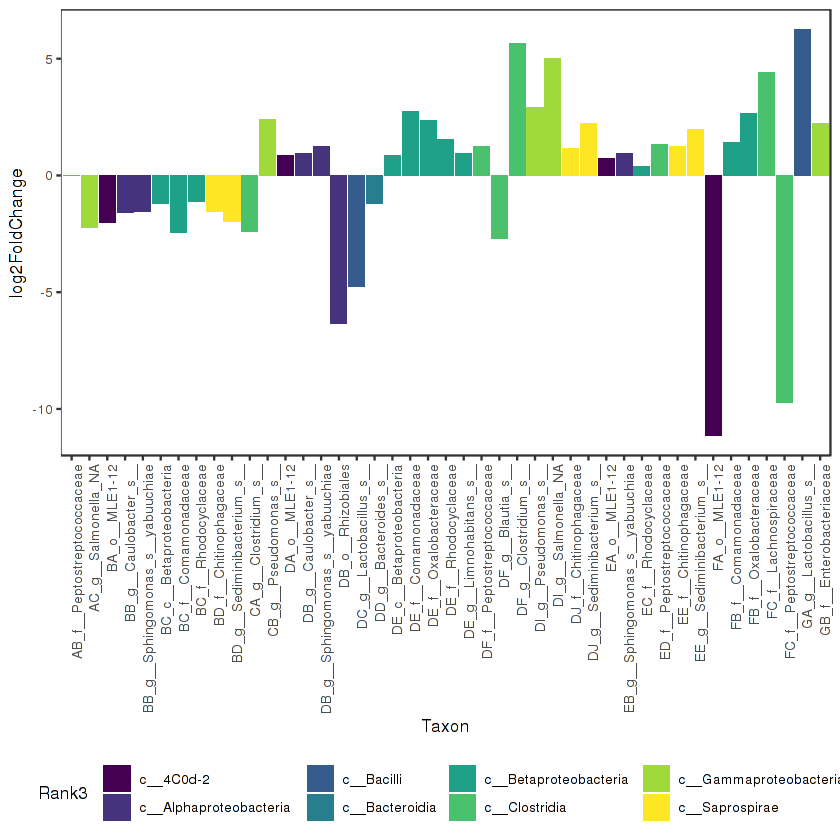

In [14]:
library(viridis)
p = ggplot(ancom_0.70.org, aes(x = Taxon, y = log2FoldChange, fill=Rank3)) + geom_bar(stat="identity")

p = p + scale_fill_viridis(option="viridis", discrete=TRUE, direction=1)

p = p + theme_bw() + theme(text=element_text(size=10, color="black",family="Calibri"),
                           #legend.key = element_blank(),
                           axis.text.x = element_text(angle = 90, hjust = 1),
                           plot.title = element_text(hjust = 0.5),
                           legend.position = "bottom",
                           #axis.title.y=element_blank(),
                           panel.grid.major = element_blank(),
                           panel.grid.minor = element_blank())

p



png('Organs_ANCOM_0.70_log2foldchange.viridis.png', width=10, height=10, units='in', res=300)
plot(p)
dev.off()

#### Heart Disease plots - ANCOM w log2fold change for all organs combined

In [13]:
#Run DESeq to get log2fold changes

tree = phy_tree(cadaver)
otu = otu_table(cadaver)
tax = tax_table(cadaver)
map = import_qiime_sample_data("/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/CSVfiles/5k_meta.txt")

cadaver.ps = merge_phyloseq(tree, otu, tax, map)
cadaver_dds = phyloseq_to_deseq2(cadaver.ps, ~Heart_Disease)


Loading required namespace: DESeq2
converting counts to integer mode


In [16]:
#Run DESeq - cadaver 5k rarefied * Heart_Disease
library(DESeq2)

gm_mean = function(x, na.rm=TRUE){
  exp(sum(log(x[x > 0]), na.rm=na.rm) / length(x))
}

geoMeans = apply(DESeq2::counts(cadaver_dds), 1, gm_mean)


cadaver_dds = estimateSizeFactors(cadaver_dds, geoMeans = geoMeans)
cadaver_dds = estimateDispersions(cadaver_dds)
abund = getVarianceStabilizedData(cadaver_dds)

cadaver_dds = DESeq(cadaver_dds, test="Wald", fitType="parametric")

res = results(cadaver_dds)
res.tax = cbind(as(res, "data.frame"), as(tax_table(cadaver.ps)[rownames(res), ], "matrix"))

write.csv(res.tax, file="/gpfs/data/gilbert-lab/Lutz/Cadaver/All_cohorts/update_march2019/DESEQ/heartdisease.deseq.log2fold.csv")


gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 476 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing


##### ANCOM: raw code from Knight Lab

In [2]:
library(exactRankTests)
library(nlme)
library(ggplot2)

ancom.W = function(otu_data,var_data,
                   adjusted,repeated,
                   main.var,adj.formula,
                   repeat.var,long,rand.formula,
                   multcorr,sig){
  
  n_otu=dim(otu_data)[2]-1
  
  otu_ids=colnames(otu_data)[-1]
  
  if(repeated==F){
    data_comp=data.frame(merge(otu_data,var_data,by="Sample.ID",all.y=T),row.names=NULL)
    #data_comp=data.frame(merge(otu_data,var_data[,c("Sample.ID",main.var)],by="Sample.ID",all.y=T),row.names=NULL)
  }else if(repeated==T){
    data_comp=data.frame(merge(otu_data,var_data,by="Sample.ID"),row.names=NULL)
   # data_comp=data.frame(merge(otu_data,var_data[,c("Sample.ID",main.var,repeat.var)],by="Sample.ID"),row.names=NULL)
  }
  
  base.formula = paste0("lr ~ ",main.var)
  if(repeated==T){
    repeat.formula = paste0(base.formula," | ", repeat.var)
  }
  if(adjusted==T){
    adjusted.formula = paste0(base.formula," + ", adj.formula)
  }
  
  if( adjusted == F & repeated == F ){
    fformula  <- formula(base.formula)
  } else if( adjusted == F & repeated == T & long == T ){
    fformula  <- formula(base.formula)   
  }else if( adjusted == F & repeated == T & long == F ){
    fformula  <- formula(repeat.formula)   
  }else if( adjusted == T & repeated == F  ){
    fformula  <- formula(adjusted.formula)   
  }else if( adjusted == T & repeated == T  ){
    fformula  <- formula(adjusted.formula)   
  }else{
    stop("Problem with data. Dataset should contain OTU abundances, groups, 
         and optionally an ID for repeated measures.")
  }
  
  
  
    if( repeated==FALSE & adjusted == FALSE){
       if( length(unique(data_comp[,which(colnames(data_comp)==main.var)]))==2 ){
          tfun <- exactRankTests::wilcox.exact
       } else{
          tfun <- stats::kruskal.test
    }
    }else if( repeated==FALSE & adjusted == TRUE){
      tfun <- stats::aov
    }else if( repeated== TRUE & adjusted == FALSE & long == FALSE){
      tfun <- stats::friedman.test
    }else if( repeated== TRUE & adjusted == FALSE & long == TRUE){
      tfun <- nlme::lme
    }else if( repeated== TRUE & adjusted == TRUE){
      tfun <- nlme::lme
    }
  
  logratio.mat <- matrix(NA, nrow=n_otu, ncol=n_otu)
  for(ii in 1:(n_otu-1)){
    for(jj in (ii+1):n_otu){
      data.pair <- data_comp[,which(colnames(data_comp)%in%otu_ids[c(ii,jj)])]
      lr <- log((1+as.numeric(data.pair[,1]))/(1+as.numeric(data.pair[,2])))
      
      lr_dat <- data.frame( lr=lr, data_comp,row.names=NULL )
      
      if(adjusted==FALSE&repeated==FALSE){  ## Wilcox, Kruskal Wallis
        logratio.mat[ii,jj] <- tfun( formula=fformula, data = lr_dat)$p.value
      }else if(adjusted==FALSE&repeated==TRUE&long==FALSE){ ## Friedman's 
        logratio.mat[ii,jj] <- tfun( formula=fformula, data = lr_dat)$p.value
      }else if(adjusted==TRUE&repeated==FALSE){ ## ANOVA
        model=tfun(formula=fformula, data = lr_dat,na.action=na.omit)   
        picker=which(gsub(" ","",row.names(summary(model)[[1]]))==main.var)  
        logratio.mat[ii,jj] <- summary(model)[[1]][["Pr(>F)"]][picker]
      }else if(repeated==TRUE&long==TRUE){ ## GEE
        model=tfun(fixed=fformula,data = lr_dat,
                   random = formula(rand.formula),
                   correlation=corAR1(),
                   na.action=na.omit)   
        picker=which(gsub(" ","",row.names(anova(model)))==main.var)
        logratio.mat[ii,jj] <- anova(model)[["p-value"]][picker]
      }
      
    }
  } 
  
  ind <- lower.tri(logratio.mat)
  logratio.mat[ind] <- t(logratio.mat)[ind]
  
  
  logratio.mat[which(is.finite(logratio.mat)==FALSE)] <- 1
  
  mc.pval <- t(apply(logratio.mat,1,function(x){
    s <- p.adjust(x, method = "BH")
    return(s)
  }))
  
  a <- logratio.mat[upper.tri(logratio.mat,diag=FALSE)==TRUE]
  
  b <- matrix(0,ncol=n_otu,nrow=n_otu)
  b[upper.tri(b)==T] <- p.adjust(a, method = "BH")
  diag(b)  <- NA
  ind.1    <- lower.tri(b)
  b[ind.1] <- t(b)[ind.1]
  
  #########################################
  ### Code to extract surrogate p-value
  surr.pval <- apply(mc.pval,1,function(x){
    s0=quantile(x[which(as.numeric(as.character(x))<sig)],0.95)
    # s0=max(x[which(as.numeric(as.character(x))<alpha)])
    return(s0)
  })
  #########################################
  ### Conservative
  if(multcorr==1){
    W <- apply(b,1,function(x){
      subp <- length(which(x<sig))
    })
    ### Moderate
  } else if(multcorr==2){
    W <- apply(mc.pval,1,function(x){
      subp <- length(which(x<sig))
    })
    ### No correction
  } else if(multcorr==3){
    W <- apply(logratio.mat,1,function(x){
      subp <- length(which(x<sig))
    })
  }
  
  return(W)
  }



ANCOM.main = function(OTUdat,Vardat,
                      adjusted,repeated,
                      main.var,adj.formula,
                      repeat.var,longitudinal,
                      random.formula,
                      multcorr,sig,
                      prev.cut){
  
  p.zeroes=apply(OTUdat[,-1],2,function(x){
    s=length(which(x==0))/length(x)
  })
  
  zeroes.dist=data.frame(colnames(OTUdat)[-1],p.zeroes,row.names=NULL)
  colnames(zeroes.dist)=c("Taxon","Proportion_zero")
  
  zero.plot = ggplot(zeroes.dist, aes(x=Proportion_zero)) + 
              geom_histogram(binwidth=0.1,colour="black",fill="white") + 
              xlab("Proportion of zeroes") + ylab("Number of taxa") +
              theme_bw()
  
  #print(zero.plot)
  
  OTUdat.thinned=OTUdat
  OTUdat.thinned=OTUdat.thinned[,c(1,1+which(p.zeroes<prev.cut))]
  
  otu.names=colnames(OTUdat.thinned)[-1]
  
  W.detected   <- ancom.W(OTUdat.thinned,Vardat,
                          adjusted,repeated,
                          main.var,adj.formula,
                          repeat.var,longitudinal,random.formula,
                          multcorr,sig)
  
  W_stat       <- W.detected
  
  
  ### Bubble plot
  
  W_frame = data.frame(otu.names,W_stat,row.names=NULL)
  W_frame = W_frame[order(-W_frame$W_stat),]
  
  W_frame$detected_0.9=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.8=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.7=rep(FALSE,dim(W_frame)[1])
  W_frame$detected_0.6=rep(FALSE,dim(W_frame)[1])
  
  W_frame$detected_0.9[which(W_frame$W_stat>0.9*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.8[which(W_frame$W_stat>0.8*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.7[which(W_frame$W_stat>0.7*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  W_frame$detected_0.6[which(W_frame$W_stat>0.6*(dim(OTUdat.thinned[,-1])[2]-1))]=TRUE
  
  final_results=list(W_frame,zero.plot)
  names(final_results)=c("W.taxa","PLot.zeroes")
  return(final_results)
    }

 Package ‘exactRankTests’ is no longer under development.
 Please consider using package ‘coin’ instead.

